In [2]:
import pandas as pd
games = pd.read_csv('games.csv')

In [4]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [5]:
print(games.shape)

(81312, 20)


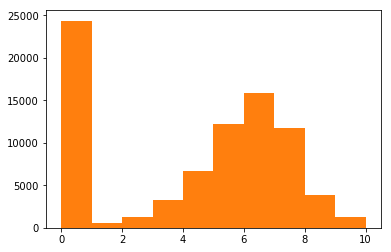

In [7]:
import matplotlib.pyplot as plt
plt.hist(games["average_rating"])
plt.show()

In [8]:
print(games[games['average_rating'] == 0].iloc[0])
print(games[games['average_rating'] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

In [9]:
games = games[games['users_rated'] > 0]

In [10]:
games = games.dropna(axis=0)

In [11]:
print(games)

           id                type  \
0       12333           boardgame   
1      120677           boardgame   
2      102794           boardgame   
3       25613           boardgame   
4        3076           boardgame   
5       31260           boardgame   
6      124742           boardgame   
7       96848           boardgame   
8       84876           boardgame   
9       72125           boardgame   
10       2651           boardgame   
11     164153           boardgame   
12     115746           boardgame   
13     121921           boardgame   
14      35677           boardgame   
15      28720           boardgame   
16     126163           boardgame   
17     150376           boardgame   
18      68448           boardgame   
19      18602           boardgame   
20     122515           boardgame   
21      40834           boardgame   
22      62219           boardgame   
23      28143           boardgame   
24     103885           boardgame   
25         93           boardgame   
2

In [12]:
print(games[games['average_rating'] == 10])

           id                type  \
20226   13200           boardgame   
20531   13617           boardgame   
35834   32200           boardgame   
44005   42096           boardgame   
53112   88581           boardgame   
53142   88753           boardgame   
53599   90849           boardgame   
53920   92496  boardgameexpansion   
54028   93010           boardgame   
54045   93103  boardgameexpansion   
54080   93286           boardgame   
54389   94769           boardgame   
54790   96668           boardgame   
54958   97409  boardgameexpansion   
55198   98377           boardgame   
55289   98727  boardgameexpansion   
55291   98729  boardgameexpansion   
55292   98730  boardgameexpansion   
55328   98868           boardgame   
55329   98870           boardgame   
55374   99037           boardgame   
55524   99573           boardgame   
55540   99615           boardgame   
55549   99629  boardgameexpansion   
55654  100014           boardgame   
55671  100094           boardgame   
5

In [26]:
high_rated = games[games['average_rating'] == 8]

In [27]:
good_games = high_rated[high_rated['users_rated'] > 10]

In [30]:
good_games = good_games[good_games['maxplayers'] > 0]
print(len(good_games))

16


In [31]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 5, random_state = 1)
good_columns = games._get_numeric_data()

In [32]:
kmeans_model.fit(good_columns)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [33]:
labels = kmeans_model.labels_


In [34]:
from sklearn.decomposition import PCA

In [35]:
pca_2 = PCA(2)

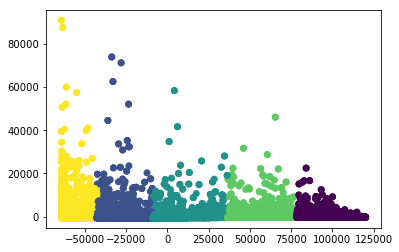

In [36]:
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

In [37]:
games.corr()["average_rating"]

id                      0.304201
yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

In [38]:
columns = games.columns.tolist()

In [39]:
print(columns)

['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating', 'bayes_average_rating', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [40]:
columns = [c for c in columns if c not in['bayes_average_rating', 'average_rating', 'type', 'name']]

In [41]:
print(columns)

['id', 'yearpublished', 'minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'total_owners', 'total_traders', 'total_wanters', 'total_wishers', 'total_comments', 'total_weights', 'average_weight']


In [42]:
target = "average_rating"

In [43]:
from sklearn.cross_validation import train_test_split

C:\Users\Awwab\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [44]:
train = games.sample(frac=0.8,random_state=1)

In [45]:
test = games.loc[~games.index.isin(train.index)]

In [46]:
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [50]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(test[columns])

In [51]:
print(predictions)

[ 6.75992275  8.36145643  8.3251177  ...,  6.45530768  6.54520485
  7.1550093 ]


In [52]:
mean_squared_error(predictions, test[target])

1.8239281903519864

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
model.fit(train[columns], train[target])
predictions = model.predict(test[columns])

KeyboardInterrupt: 